### 1.1 Reading in the policy data of countries

In [1]:
#reading in the policy data of countries
import pandas as pd

c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [2]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]
result = pd.concat(frames)

print( result.shape)

(1488, 564)


In [4]:
result.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Extracting policy scores of Germany, Hungary, italy, Poland and Sweden

In [5]:
#extracting restrinction policy scores of 8 policies for 5 different countries 
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [6]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
#inspect deutch dataframe
deutch_policy.head(10)
#The last row is the sum of all the above rows called "Row_total"

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
4,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Daily_Sum,DEUDEUDEUDEUDEUDEUDEUDEU,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0


### 1.3 Preparing policy dataframe of  Germany

In [8]:

#extract the germany policy column 

deutch_policy_transposed =deutch_policy.T 
deutch_policy_transposed.reset_index(inplace=True)

deutch_policy_transposed = deutch_policy_transposed.drop(labels=0, axis=0)
deutch_policy_transposed.rename(columns=deutch_policy_transposed.iloc[0])
deutch_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,GermanyGermanyGermanyGermanyGermanyGermanyGerm...
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [9]:
#drop the first row
deutch_policy_transposed=deutch_policy_transposed.iloc[1:,:]
deutch_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [10]:
print(deutch_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  2  0  1  0  0  0  0  1         4
63  02Mar2020  2  0  1  0  0  0  0  1         4
64  03Mar2020  2  0  1  0  0  0  0  1         4
65  04Mar2020  2  0  1  0  0  0  0  1         4
66  05Mar2020  2  0  1  0  0  0  0  1         4


In [11]:
# rename the "index column" to "Date" and change it from string to datetime

deutch_policy_transposed.columns
deutch_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']
deutch_policy_transposed['Date']=pd.to_datetime(deutch_policy_transposed['Date'])

deutch_policy_transposed.head()

,Date,0,1,2,3,4,5,6,7,Daily_Sum
2,2020-01-01,0,0,0,0,0,0,0,0,0
3,2020-01-02,0,0,0,0,0,0,0,0,0
4,2020-01-03,0,0,0,0,0,0,0,0,0
5,2020-01-04,0,0,0,0,0,0,0,0,0
6,2020-01-05,0,0,0,0,0,0,0,0,0


### 1.4 Preparing the independent variable for Germany = weekely policy average

In [12]:

#extract the week number (of the year) and add it as a new column

deutch_policy_transposed['week_of_year']= deutch_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
deutch_policy_transposed.head(20)

,Date,0,1,2,3,4,5,6,7,Daily_Sum,week_of_year
2,2020-01-01,0,0,0,0,0,0,0,0,0,1
3,2020-01-02,0,0,0,0,0,0,0,0,0,1
4,2020-01-03,0,0,0,0,0,0,0,0,0,1
5,2020-01-04,0,0,0,0,0,0,0,0,0,1
6,2020-01-05,0,0,0,0,0,0,0,0,0,1
7,2020-01-06,0,0,0,0,0,0,0,0,0,2
8,2020-01-07,0,0,0,0,0,0,0,0,0,2
9,2020-01-08,0,0,0,0,0,0,0,0,0,2
10,2020-01-09,0,0,0,0,0,0,0,0,0,2
11,2020-01-10,0,0,0,0,0,0,0,0,0,2


In [13]:
# slice anf set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

deutch_policy_transposed_FirstLastWeekDropped=deutch_policy_transposed.loc[( (deutch_policy_transposed['Date'] < '2021-01-01 00:00:00') & (deutch_policy_transposed['week_of_year']< 52) & (1<deutch_policy_transposed['week_of_year']))]

#head
deutch_policy_transposed_FirstLastWeekDropped.head()


,Date,0,1,2,3,4,5,6,7,Daily_Sum,week_of_year
7,2020-01-06,0,0,0,0,0,0,0,0,0,2
8,2020-01-07,0,0,0,0,0,0,0,0,0,2
9,2020-01-08,0,0,0,0,0,0,0,0,0,2
10,2020-01-09,0,0,0,0,0,0,0,0,0,2
11,2020-01-10,0,0,0,0,0,0,0,0,0,2


In [14]:
#tail
deutch_policy_transposed_FirstLastWeekDropped.tail()

,Date,0,1,2,3,4,5,6,7,Daily_Sum,week_of_year
352,2020-12-16,3,3,2,4,1,2,1,3,19,51
353,2020-12-17,3,3,2,4,1,2,1,3,19,51
354,2020-12-18,3,3,2,4,1,2,1,3,19,51
355,2020-12-19,3,3,2,4,1,2,1,3,19,51
356,2020-12-20,3,3,2,4,1,2,1,3,19,51


In [15]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_deutch=deutch_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
policy_2020_total_deutch.head(10)

,Daily_Sum,week_of_year
7,0,2
8,0,2
9,0,2
10,0,2
11,0,2
12,0,2
13,0,2
14,0,3
15,0,3
16,0,3


In [16]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_deutch=policy_2020_total_deutch.groupby(['week_of_year']).sum()


In [17]:
print(weekly_policy_2020_deutch.iloc[:18, :])

              Daily_Sum
week_of_year           
2                   0.0
3                   0.0
4                   0.0
5                   0.0
6                   0.0
7                   0.0
8                   0.0
9                  15.0
10                 28.0
11                 47.0
12                 94.0
13                133.0
14                133.0
15                133.0
16                133.0
17                133.0
18                133.0
19                116.0


In [18]:
#average weekly independent variable
weekly_policy_2020_deutch=weekly_policy_2020_deutch/7
weekly_policy_2020_deutch.head(10)

,Daily_Sum
week_of_year,
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,2.142857
10,4.000000


In [19]:
#the final independent variable in list form 
weekly_policy_2020_deutch=weekly_policy_2020_deutch['Daily_Sum'].tolist()
print(weekly_policy_2020_deutch[:14])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.142857142857143, 4.0, 6.714285714285714, 13.428571428571429, 19.0, 19.0, 19.0]


## 2 Reading in the editorship data
### 2.1

In [20]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [21]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [22]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [23]:
revs_deutch.head()

,y,m,d,h,c
0,2018,1,1,0,987
1,2018,1,1,1,1024
2,2018,1,1,2,766
3,2018,1,1,3,681
4,2018,1,1,4,465


In [24]:

#making up the datetime structure 
revs_deutch['dateInt']=revs_deutch['y'].astype(str) + revs_deutch['m'].astype(str).str.zfill(2)+ revs_deutch['d'].astype(str).str.zfill(2)
revs_deutch['Date'] = pd.to_datetime(revs_deutch['dateInt'], format='%Y%m%d')      
revs_deutch = revs_deutch.reset_index()
revs_deutch.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,1,0,987,20180101,2018-01-01
1,1,2018,1,1,1,1024,20180101,2018-01-01
2,2,2018,1,1,2,766,20180101,2018-01-01
3,3,2018,1,1,3,681,20180101,2018-01-01
4,4,2018,1,1,4,465,20180101,2018-01-01


In [25]:
print(revs_deutch.iloc[50:55, :])

    index     y  m  d  h    c   dateInt       Date
50     50  2018  1  3  2  517  20180103 2018-01-03
51     51  2018  1  3  3  520  20180103 2018-01-03
52     52  2018  1  3  4  397  20180103 2018-01-03
53     53  2018  1  3  5  254  20180103 2018-01-03
54     54  2018  1  3  6  476  20180103 2018-01-03


In [26]:

#extract the week number and add it as a new column
revs_deutch['week_of_year']= revs_deutch['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_deutch['hour_of_week']=revs_deutch['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_deutch['hour_of_week']=revs_deutch['Date'].apply(lambda x: 24*x.weekday()) + revs_deutch['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_deutch.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
0,0,2018,1,1,0,987,20180101,2018-01-01,1,0
1,1,2018,1,1,1,1024,20180101,2018-01-01,1,1
2,2,2018,1,1,2,766,20180101,2018-01-01,1,2
3,3,2018,1,1,3,681,20180101,2018-01-01,1,3
4,4,2018,1,1,4,465,20180101,2018-01-01,1,4
5,5,2018,1,1,5,294,20180101,2018-01-01,1,5
6,6,2018,1,1,6,263,20180101,2018-01-01,1,6
7,7,2018,1,1,7,300,20180101,2018-01-01,1,7
8,8,2018,1,1,8,590,20180101,2018-01-01,1,8
9,9,2018,1,1,9,965,20180101,2018-01-01,1,9


### 2.2 Prepare editorship data Germany for 2020

In [27]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_deutch_2020=revs_deutch.loc[(revs_deutch['Date'] >= '2020-01-01 00:00:00') & (revs_deutch['Date'] < '2021-01-01 00:00:00')& (revs_deutch['week_of_year'] < 52)& (1<revs_deutch['week_of_year'])]
revs_deutch_2020.head(40)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17640,17640,2020,1,6,0,616,20200106,2020-01-06,2,0
17641,17641,2020,1,6,1,370,20200106,2020-01-06,2,1
17642,17642,2020,1,6,2,305,20200106,2020-01-06,2,2
17643,17643,2020,1,6,3,620,20200106,2020-01-06,2,3
17644,17644,2020,1,6,4,669,20200106,2020-01-06,2,4
17645,17645,2020,1,6,5,633,20200106,2020-01-06,2,5
17646,17646,2020,1,6,6,519,20200106,2020-01-06,2,6
17647,17647,2020,1,6,7,979,20200106,2020-01-06,2,7
17648,17648,2020,1,6,8,860,20200106,2020-01-06,2,8
17649,17649,2020,1,6,9,1202,20200106,2020-01-06,2,9


In [28]:
#tail
revs_deutch_2020.tail(20)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
26020,26020,2020,12,20,4,585,20201220,2020-12-20,51,148
26021,26021,2020,12,20,5,584,20201220,2020-12-20,51,149
26022,26022,2020,12,20,6,506,20201220,2020-12-20,51,150
26023,26023,2020,12,20,7,1085,20201220,2020-12-20,51,151
26024,26024,2020,12,20,8,1257,20201220,2020-12-20,51,152
26025,26025,2020,12,20,9,1556,20201220,2020-12-20,51,153
26026,26026,2020,12,20,10,1880,20201220,2020-12-20,51,154
26027,26027,2020,12,20,11,1694,20201220,2020-12-20,51,155
26028,26028,2020,12,20,12,1527,20201220,2020-12-20,51,156
26029,26029,2020,12,20,13,1540,20201220,2020-12-20,51,157


In [29]:

#group by 'week_of_year', 'hour_of_week' 

grouped_deutch_2020=revs_deutch_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_deutch_2020 = grouped_deutch_2020.reset_index()
grouped_deutch_2020.head(20)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,17640,2020,1,6,0,616
1,2,1,17641,2020,1,6,1,370
2,2,2,17642,2020,1,6,2,305
3,2,3,17643,2020,1,6,3,620
4,2,4,17644,2020,1,6,4,669
5,2,5,17645,2020,1,6,5,633
6,2,6,17646,2020,1,6,6,519
7,2,7,17647,2020,1,6,7,979
8,2,8,17648,2020,1,6,8,860
9,2,9,17649,2020,1,6,9,1202


In [30]:
#tail
grouped_deutch_2020.tail(20)

,week_of_year,hour_of_week,index,y,m,d,h,c
8380,51,148,26020,2020,12,20,4,585
8381,51,149,26021,2020,12,20,5,584
8382,51,150,26022,2020,12,20,6,506
8383,51,151,26023,2020,12,20,7,1085
8384,51,152,26024,2020,12,20,8,1257
8385,51,153,26025,2020,12,20,9,1556
8386,51,154,26026,2020,12,20,10,1880
8387,51,155,26027,2020,12,20,11,1694
8388,51,156,26028,2020,12,20,12,1527
8389,51,157,26029,2020,12,20,13,1540


In [31]:
import numpy as np

#populate the numpy array 

array_weekly_events_deutch_2020 = np.zeros((52,168))


for  i in range (grouped_deutch_2020.shape[0]):
    
    week=grouped_deutch_2020.iloc[i]['week_of_year']
    hour=grouped_deutch_2020.iloc[i]['hour_of_week']
    array_weekly_events_deutch_2020[week][hour]= grouped_deutch_2020.iloc[i]['c']
    


In [32]:
print(array_weekly_events_deutch_2020)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [ 616.  370.  305. ... 1276.  939. 1015.]
 ...
 [ 522.  676.  368. ... 1165.  989.  748.]
 [ 516.  650.  448. ... 1075. 1237.  989.]
 [ 532.  662.  661. ... 1228.  942.  963.]]


In [33]:
print(array_weekly_events_deutch_2020[3][:])

[ 502.  309.  245.  456.  538.  625. 1047. 1009. 1079.  974. 1134. 1160.
 1210. 1309. 1320. 1335. 1552. 1621. 1691. 1697. 1590. 1396. 1107.  707.
  573.  431.  235.  627.  569.  621.  798. 1116. 1001. 1070. 1070. 1096.
 1162. 1314. 1181. 1265. 1386. 1713. 1320. 1372. 1778. 1536.  938.  791.
  407.  295.  374.  774.  586.  718.  769. 1018. 1232. 1250. 1397. 1150.
 1193. 1337. 1476. 1413. 1392. 1585. 1851. 1392. 1346. 1232.  886.  620.
  447.  320.  252.  682.  499.  725.  686. 1125. 1180. 1260. 1168.  970.
 1122. 1166. 1535. 1154. 1402. 1523. 1317. 1041. 1512. 1161.  998.  652.
  379.  288.  224.  618.  436.  577.  589.  898.  991. 1076. 1211. 1169.
 1195. 1111. 1189. 1301. 1510. 1158. 1178. 1016. 1306. 1102. 1112.  682.
  407.  281.  262.  711.  458.  688.  633.  858. 1049. 1268. 1440. 1352.
 1234. 1426. 1519. 1316. 1636. 1441. 1719. 1434. 1481. 1380.  964.  778.
  561.  366.  421.  777.  551.  602.  639.  816.  952. 1473. 1511. 1641.
 1867. 1574. 1514. 1425. 1557. 1962. 1510. 1501. 15

In [34]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_deutch_2020=np.sum(array_weekly_events_deutch_2020 , axis=1)
print(weekly_sum_deutch_2020)

[     0.      0. 175960. 176125. 186821. 184773. 185034. 180994. 186485.
 197641. 184617. 178193. 185274. 194772. 204332. 196226. 216421. 203550.
 212990. 190171. 192308. 184851. 177861. 179556. 201572. 178276. 168020.
 172906. 174054. 171909. 176591. 170752. 162886. 170912. 168071. 184426.
 170270. 155431. 157816. 171885. 172133. 168398. 171735. 172835. 179803.
 177330. 183572. 199079. 195787. 187348. 183383. 186243.]


### 2.3  168 daily ratios for 2020 germany

In [35]:

array_weekly_ratios_deutch_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_deutch_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_deutch_2020[i]=array_weekly_events_deutch_2020[i+2]/weekly_sum_deutch_2020[i+2]

print(array_weekly_ratios_deutch_2020)

[[0.0035008  0.00210275 0.00173335 ... 0.00725165 0.00533644 0.00576836]
 [0.00285025 0.00175444 0.00139106 ... 0.00671114 0.00614904 0.00515543]
 [0.00254254 0.00132747 0.00125254 ... 0.00816825 0.00550259 0.00540089]
 ...
 [0.00278626 0.00360826 0.00196426 ... 0.00621837 0.00527895 0.00399257]
 [0.00281378 0.00354449 0.00244297 ... 0.00586205 0.00674545 0.00539308]
 [0.00285648 0.0035545  0.00354913 ... 0.00659354 0.00505791 0.00517066]]


In [36]:
print(array_weekly_ratios_deutch_2020[1][:])

[0.00285025 0.00175444 0.00139106 0.00258907 0.00305465 0.00354862
 0.00594464 0.00572889 0.00612633 0.00553016 0.00643861 0.00658623
 0.00687012 0.00743222 0.00749468 0.00757984 0.00881192 0.00920369
 0.00960114 0.0096352  0.00902768 0.00792619 0.00628531 0.00401419
 0.00325337 0.00244713 0.00133428 0.00355997 0.00323066 0.0035259
 0.00453087 0.00633641 0.00568346 0.00607523 0.00607523 0.00622285
 0.00659759 0.00746061 0.00670546 0.0071824  0.00786941 0.00972605
 0.00749468 0.00778992 0.0100951  0.00872108 0.00532576 0.00449113
 0.00231086 0.00167495 0.00212349 0.00439461 0.00332718 0.00407665
 0.00436622 0.00577999 0.00699503 0.00709723 0.00793187 0.00652945
 0.0067736  0.0075912  0.00838041 0.00802271 0.00790348 0.00899929
 0.01050958 0.00790348 0.0076423  0.00699503 0.00503052 0.00352023
 0.00253797 0.00181689 0.0014308  0.00387225 0.00283322 0.00411639
 0.00389496 0.00638751 0.00669979 0.00715401 0.00663165 0.00550745
 0.00637048 0.0066203  0.0087154  0.00655216 0.00796026 0.00864

### 2.3 Prepare editorship data Germany for 2019

In [37]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_deutch_2019=revs_deutch.loc[(revs_deutch['Date'] >= '2019-01-01 00:00:00') & (revs_deutch['Date'] < '2020-01-01 00:00:00') & (revs_deutch['week_of_year'] < 52)& (1<revs_deutch['week_of_year'])]
revs_deutch_2019.head(20)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
8904,8904,2019,1,7,0,755,20190107,2019-01-07,2,0
8905,8905,2019,1,7,1,676,20190107,2019-01-07,2,1
8906,8906,2019,1,7,2,868,20190107,2019-01-07,2,2
8907,8907,2019,1,7,3,753,20190107,2019-01-07,2,3
8908,8908,2019,1,7,4,794,20190107,2019-01-07,2,4
8909,8909,2019,1,7,5,372,20190107,2019-01-07,2,5
8910,8910,2019,1,7,6,519,20190107,2019-01-07,2,6
8911,8911,2019,1,7,7,920,20190107,2019-01-07,2,7
8912,8912,2019,1,7,8,1119,20190107,2019-01-07,2,8
8913,8913,2019,1,7,9,1334,20190107,2019-01-07,2,9


In [38]:
revs_deutch_2019.tail(20)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17284,17284,2019,12,22,4,377,20191222,2019-12-22,51,148
17285,17285,2019,12,22,5,516,20191222,2019-12-22,51,149
17286,17286,2019,12,22,6,494,20191222,2019-12-22,51,150
17287,17287,2019,12,22,7,750,20191222,2019-12-22,51,151
17288,17288,2019,12,22,8,744,20191222,2019-12-22,51,152
17289,17289,2019,12,22,9,1177,20191222,2019-12-22,51,153
17290,17290,2019,12,22,10,1367,20191222,2019-12-22,51,154
17291,17291,2019,12,22,11,1149,20191222,2019-12-22,51,155
17292,17292,2019,12,22,12,1176,20191222,2019-12-22,51,156
17293,17293,2019,12,22,13,1429,20191222,2019-12-22,51,157


In [39]:

grouped_deutch_2019=revs_deutch_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_deutch_2019 = grouped_deutch_2019.reset_index()
grouped_deutch_2019.head(20)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,8904,2019,1,7,0,755
1,2,1,8905,2019,1,7,1,676
2,2,2,8906,2019,1,7,2,868
3,2,3,8907,2019,1,7,3,753
4,2,4,8908,2019,1,7,4,794
5,2,5,8909,2019,1,7,5,372
6,2,6,8910,2019,1,7,6,519
7,2,7,8911,2019,1,7,7,920
8,2,8,8912,2019,1,7,8,1119
9,2,9,8913,2019,1,7,9,1334


In [40]:
grouped_deutch_2019.tail(20)

,week_of_year,hour_of_week,index,y,m,d,h,c
8380,51,148,17284,2019,12,22,4,377
8381,51,149,17285,2019,12,22,5,516
8382,51,150,17286,2019,12,22,6,494
8383,51,151,17287,2019,12,22,7,750
8384,51,152,17288,2019,12,22,8,744
8385,51,153,17289,2019,12,22,9,1177
8386,51,154,17290,2019,12,22,10,1367
8387,51,155,17291,2019,12,22,11,1149
8388,51,156,17292,2019,12,22,12,1176
8389,51,157,17293,2019,12,22,13,1429


In [41]:


array_weekly_events_deutch_2019 = np.zeros((52,168))



for  i in range (grouped_deutch_2019.shape[0]):
    
    week=grouped_deutch_2019.iloc[i]['week_of_year']
    hour=grouped_deutch_2019.iloc[i]['hour_of_week']
    array_weekly_events_deutch_2019[week][hour]= grouped_deutch_2019.iloc[i]['c']

print(array_weekly_events_deutch_2019)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [ 755.  676.  868. ... 1220.  834. 1024.]
 ...
 [ 396.  305.  365. ... 1259.  900.  883.]
 [ 426.  353.  346. ... 1232. 1021.  995.]
 [ 599.  353.  422. ... 1115.  955.  922.]]


In [42]:
print(array_weekly_events_deutch_2020[3][:])

[ 502.  309.  245.  456.  538.  625. 1047. 1009. 1079.  974. 1134. 1160.
 1210. 1309. 1320. 1335. 1552. 1621. 1691. 1697. 1590. 1396. 1107.  707.
  573.  431.  235.  627.  569.  621.  798. 1116. 1001. 1070. 1070. 1096.
 1162. 1314. 1181. 1265. 1386. 1713. 1320. 1372. 1778. 1536.  938.  791.
  407.  295.  374.  774.  586.  718.  769. 1018. 1232. 1250. 1397. 1150.
 1193. 1337. 1476. 1413. 1392. 1585. 1851. 1392. 1346. 1232.  886.  620.
  447.  320.  252.  682.  499.  725.  686. 1125. 1180. 1260. 1168.  970.
 1122. 1166. 1535. 1154. 1402. 1523. 1317. 1041. 1512. 1161.  998.  652.
  379.  288.  224.  618.  436.  577.  589.  898.  991. 1076. 1211. 1169.
 1195. 1111. 1189. 1301. 1510. 1158. 1178. 1016. 1306. 1102. 1112.  682.
  407.  281.  262.  711.  458.  688.  633.  858. 1049. 1268. 1440. 1352.
 1234. 1426. 1519. 1316. 1636. 1441. 1719. 1434. 1481. 1380.  964.  778.
  561.  366.  421.  777.  551.  602.  639.  816.  952. 1473. 1511. 1641.
 1867. 1574. 1514. 1425. 1557. 1962. 1510. 1501. 15

In [43]:
weekly_sum_deutch_2019=np.sum(array_weekly_events_deutch_2019 , axis=1)
print(weekly_sum_deutch_2019)

[     0.      0. 193607. 178849. 194238. 182147. 180296. 176237. 188794.
 180488. 199201. 202202. 174986. 177972. 168785. 174221. 175310. 203676.
 207502. 200327. 199579. 200205. 175434. 169195. 167120. 164316. 164573.
 172203. 183853. 159026. 164046. 171402. 172702. 177445. 178150. 172475.
 174850. 159268. 176457. 184150. 170029. 163678. 165601. 167674. 174043.
 172207. 164424. 174233. 171134. 158792. 159864. 155790.]


In [44]:

array_weekly_ratios_deutch_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_deutch_2019[i]=array_weekly_events_deutch_2019[i+2]/weekly_sum_deutch_2019[i+2]

print(array_weekly_ratios_deutch_2019)

[[0.00389965 0.00349161 0.00448331 ... 0.00630143 0.0043077  0.00528906]
 [0.00387478 0.00333242 0.00433886 ... 0.00829191 0.00542916 0.00498745]
 [0.0023116  0.00284187 0.0041341  ... 0.00761437 0.00891175 0.00862859]
 ...
 [0.00249383 0.00192075 0.0022986  ... 0.00792861 0.00566779 0.00556073]
 [0.00266477 0.00220813 0.00216434 ... 0.00770655 0.00638668 0.00622404]
 [0.00384492 0.00226587 0.00270877 ... 0.00715707 0.00613005 0.00591822]]


In [45]:
print(array_weekly_ratios_deutch_2019[1][:])

[0.00387478 0.00333242 0.00433886 0.00384123 0.00409843 0.00242104
 0.00363994 0.00407606 0.00618399 0.00674312 0.00627345 0.00722397
 0.008236   0.00734698 0.00833664 0.01084714 0.00749235 0.00739171
 0.00767128 0.00873922 0.00847083 0.00683817 0.00596034 0.004501
 0.00300253 0.00399219 0.00369026 0.00228685 0.00290189 0.00201287
 0.00333801 0.00409843 0.00753708 0.0090691  0.00896846 0.00716247
 0.00670957 0.00683817 0.00756504 0.00773278 0.00811299 0.00825836
 0.00720161 0.00702268 0.00853793 0.00716247 0.00577582 0.00422144
 0.00271178 0.00323178 0.00366231 0.00284038 0.00352252 0.00217502
 0.0033436  0.0048868  0.00525024 0.00593797 0.00801794 0.00771601
 0.00708419 0.0072687  0.00693881 0.00708419 0.00809062 0.00717924
 0.0074644  0.00811299 0.00894609 0.00696677 0.00452896 0.0039866
 0.00188427 0.00207438 0.0028963  0.00269501 0.00339392 0.00232039
 0.00352252 0.00465197 0.00516637 0.00656979 0.00596034 0.00722397
 0.00707301 0.00699473 0.00774955 0.00770482 0.00759859 0.0067487

## 3 earthmover and jensenshanon plots

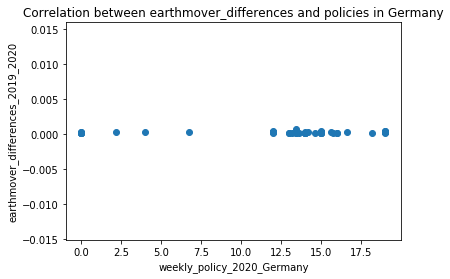

In [46]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list
from scipy.stats import wasserstein_distance

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))


from matplotlib import pyplot 
import matplotlib.pyplot as plt


plt.scatter(weekly_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



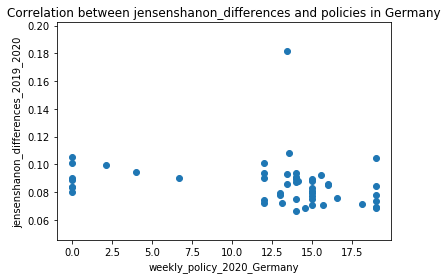

In [47]:

#jensen shanon divergence

from scipy.spatial import distance
jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    

plt.scatter(weekly_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()



# Poland
## 1. prepare the policy data for Poland 

In [48]:

poland_policy_transposed =poland_policy.T 
poland_policy_transposed.reset_index(inplace=True)

poland_policy_transposed = poland_policy_transposed.drop(labels=0, axis=0)
poland_policy_transposed.rename(columns=poland_policy_transposed.iloc[0])
poland_policy_transposed.head()



,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Poland,Poland,Poland,Poland,Poland,Poland,Poland,Poland,PolandPolandPolandPolandPolandPolandPolandPoland
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [49]:
#drop the first row
poland_policy_transposed=poland_policy_transposed.iloc[1:,:]
poland_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [50]:
print(poland_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  0  0  0  0  0  0  0  0         0
63  02Mar2020  0  0  0  0  0  0  0  0         0
64  03Mar2020  0  0  0  0  0  0  0  0         0
65  04Mar2020  0  0  0  0  0  0  0  0         0
66  05Mar2020  0  0  0  0  0  0  0  0         0


In [51]:

# rename the "index column" to "Date" and change it from string to datetime

poland_policy_transposed.columns
poland_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']
poland_policy_transposed['Date']=pd.to_datetime(poland_policy_transposed['Date'])

poland_policy_transposed.head()


,Date,0,1,2,3,4,5,6,7,Daily_Sum
2,2020-01-01,0,0,0,0,0,0,0,0,0
3,2020-01-02,0,0,0,0,0,0,0,0,0
4,2020-01-03,0,0,0,0,0,0,0,0,0
5,2020-01-04,0,0,0,0,0,0,0,0,0
6,2020-01-05,0,0,0,0,0,0,0,0,0


In [52]:


#extract the week number (of the year) and add it as a new column

poland_policy_transposed['week_of_year']= poland_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
poland_policy_transposed.head(20)


,Date,0,1,2,3,4,5,6,7,Daily_Sum,week_of_year
2,2020-01-01,0,0,0,0,0,0,0,0,0,1
3,2020-01-02,0,0,0,0,0,0,0,0,0,1
4,2020-01-03,0,0,0,0,0,0,0,0,0,1
5,2020-01-04,0,0,0,0,0,0,0,0,0,1
6,2020-01-05,0,0,0,0,0,0,0,0,0,1
7,2020-01-06,0,0,0,0,0,0,0,0,0,2
8,2020-01-07,0,0,0,0,0,0,0,0,0,2
9,2020-01-08,0,0,0,0,0,0,0,0,0,2
10,2020-01-09,0,0,0,0,0,0,0,0,0,2
11,2020-01-10,0,0,0,0,0,0,0,0,0,2


In [53]:

# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

poland_policy_transposed_FirstLastWeekDropped=poland_policy_transposed.loc[( (poland_policy_transposed['Date'] < '2021-01-01 00:00:00') & (poland_policy_transposed['week_of_year']< 52) & (1<poland_policy_transposed['week_of_year']))]



In [54]:

#head
poland_policy_transposed_FirstLastWeekDropped.head()


,Date,0,1,2,3,4,5,6,7,Daily_Sum,week_of_year
7,2020-01-06,0,0,0,0,0,0,0,0,0,2
8,2020-01-07,0,0,0,0,0,0,0,0,0,2
9,2020-01-08,0,0,0,0,0,0,0,0,0,2
10,2020-01-09,0,0,0,0,0,0,0,0,0,2
11,2020-01-10,0,0,0,0,0,0,0,0,0,2


In [55]:

#tail
poland_policy_transposed_FirstLastWeekDropped.tail()


,Date,0,1,2,3,4,5,6,7,Daily_Sum,week_of_year
352,2020-12-16,3,2,2,4,1,1,1,3,17,51
353,2020-12-17,3,2,2,4,1,1,1,3,17,51
354,2020-12-18,3,2,2,4,1,1,1,3,17,51
355,2020-12-19,3,2,2,4,1,1,1,3,17,51
356,2020-12-20,3,2,2,4,1,1,1,3,17,51


In [56]:

#extract only the two columns of daily_sum and week_of year
policy_2020_total_poland=poland_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
policy_2020_total_poland.head(10)


,Daily_Sum,week_of_year
7,0,2
8,0,2
9,0,2
10,0,2
11,0,2
12,0,2
13,0,2
14,0,3
15,0,3
16,0,3


In [57]:

#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_poland=policy_2020_total_poland.groupby(['week_of_year']).sum()

print(weekly_policy_2020_poland.iloc[:18, :])


              Daily_Sum
week_of_year           
2                   0.0
3                   0.0
4                   0.0
5                   0.0
6                   0.0
7                   0.0
8                   0.0
9                   0.0
10                  0.0
11                 42.0
12                 84.0
13                 84.0
14                126.0
15                133.0
16                133.0
17                133.0
18                133.0
19                133.0


In [58]:

#average weekly independent variable
weekly_policy_2020_poland=weekly_policy_2020_poland/7
weekly_policy_2020_poland.head(10)


,Daily_Sum
week_of_year,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0


In [59]:

#the final independent variable in list form 
weekly_policy_2020_poland=weekly_policy_2020_poland['Daily_Sum'].tolist()
print(weekly_policy_2020_poland[:14])



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 12.0, 12.0, 18.0, 19.0]


## 2. Prepare the 2020 and 2019 daily ratios for editorship of Poland

In [60]:

#making up the datetime structure 
revs_poland['dateInt']=revs_poland['y'].astype(str) + revs_poland['m'].astype(str).str.zfill(2)+ revs_poland['d'].astype(str).str.zfill(2)
revs_poland['Date'] = pd.to_datetime(revs_poland['dateInt'], format='%Y%m%d')      
revs_poland = revs_poland.reset_index()


In [61]:
revs_poland.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,1,0,247,20180101,2018-01-01
1,1,2018,1,1,1,189,20180101,2018-01-01
2,2,2018,1,1,2,98,20180101,2018-01-01
3,3,2018,1,1,3,161,20180101,2018-01-01
4,4,2018,1,1,4,75,20180101,2018-01-01


In [62]:

#extract the week number and add it as a new column
revs_poland['week_of_year']= revs_poland['Date'].apply(lambda x: x.isocalendar()[1])
#extract the hour of the week
#revs_poland['hour_of_week']=revs_poland['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_poland['hour_of_week']=revs_poland['Date'].apply(lambda x: 24*x.weekday()) + revs_poland['h']



In [63]:

revs_poland_2019=revs_poland.loc[(revs_poland['Date'] >= '2019-01-01 00:00:00') & (revs_poland['Date'] < '2020-01-01 00:00:00') & (revs_poland['week_of_year'] < 52)& (1<revs_poland['week_of_year'])]
revs_poland_2020=revs_poland.loc[(revs_poland['Date'] >= '2020-01-01 00:00:00') & (revs_poland['Date'] < '2021-01-01 00:00:00')& (revs_poland['week_of_year'] < 52)& (1<revs_poland['week_of_year'])]


In [64]:
grouped_poland_2020=revs_poland_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_poland_2020 = grouped_poland_2020.reset_index()
grouped_poland_2020.head(20)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,17640,2020,1,6,0,537
1,2,1,17641,2020,1,6,1,88
2,2,2,17642,2020,1,6,2,47
3,2,3,17643,2020,1,6,3,52
4,2,4,17644,2020,1,6,4,33
5,2,5,17645,2020,1,6,5,91
6,2,6,17646,2020,1,6,6,46
7,2,7,17647,2020,1,6,7,140
8,2,8,17648,2020,1,6,8,208
9,2,9,17649,2020,1,6,9,269


In [65]:


array_weekly_events_poland_2020 = np.zeros((52,168))
for  i in range (grouped_poland_2020.shape[0]):
    
    week=grouped_poland_2020.iloc[i]['week_of_year']
    hour=grouped_poland_2020.iloc[i]['hour_of_week']
    array_weekly_events_poland_2020[week][hour]= grouped_poland_2020.iloc[i]['c']
    
    

In [66]:
print(array_weekly_events_poland_2020)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [537.  88.  47. ... 347. 481. 341.]
 ...
 [343.  91.  41. ... 540. 455. 243.]
 [132.  85.  88. ... 567. 445. 257.]
 [165. 207.  86. ... 298. 294. 201.]]


In [67]:
weekly_sum_poland_2020=np.sum(array_weekly_events_poland_2020 , axis=1)
print(weekly_sum_poland_2020)

[     0.      0.  45680.  44749.  43142.  46374.  63660.  61390.  51120.
  57919.  55674.  59889.  69541.  68688.  58324.  57591. 107543.  73371.
  64382.  66537.  68940.  55121.  59265.  56101.  49391.  54014.  64282.
  67845.  78158.  46439.  40676.  40954.  41888.  39295.  48439.  45894.
  48706.  40269.  40511.  48019.  59388.  46492.  50494.  51230.  46553.
  52885.  53432.  68575.  73766.  68108.  52767.  45887.]


In [68]:

array_weekly_ratios_poland_2020=np.zeros((50,168))
    
for i in range (50):
    
    array_weekly_ratios_poland_2020[i]=array_weekly_events_poland_2020[i+2]/weekly_sum_poland_2020[i+2]



In [69]:


#same for 2019
grouped_poland_2019=revs_poland_2019.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_poland_2019 = grouped_poland_2019.reset_index()


In [70]:


array_weekly_events_poland_2019 = np.zeros((52,168))
for  i in range (grouped_poland_2019.shape[0]):
    
    week=grouped_poland_2019.iloc[i]['week_of_year']
    hour=grouped_poland_2019.iloc[i]['hour_of_week']
    array_weekly_events_poland_2019[week][hour]= grouped_poland_2019.iloc[i]['c']
    

In [71]:
weekly_sum_poland_2019=np.sum(array_weekly_events_poland_2019 , axis=1)
print(weekly_sum_poland_2019)

[    0.     0. 52325. 54718. 56413. 80696. 52175. 69595. 55681. 47686.
 46421. 83086. 51662. 54655. 53803. 45676. 43218. 48446. 44564. 44813.
 40923. 36721. 41684. 35303. 37639. 39838. 34124. 34647. 39605. 35255.
 34858. 33884. 33884. 34291. 58556. 43040. 33126. 34477. 39174. 71400.
 75118. 39004. 41773. 36249. 57272. 42383. 41250. 87147. 68305. 42926.
 44087. 55727.]


In [72]:


array_weekly_ratios_poland_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_poland_2019[i]=array_weekly_events_poland_2019[i+2]/weekly_sum_poland_2019[i+2]




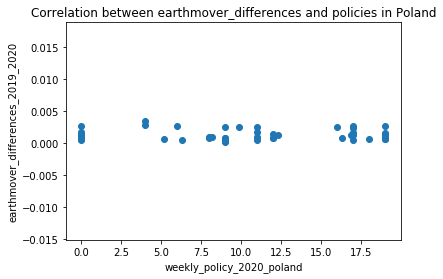

In [73]:

 #earthmover   
    
#first we find the difference between array_weekly_ratios_poland_2019[i] and array_weekly_ratios_poland_2020[i]  
#and append this difference to a list
from scipy.stats import wasserstein_distance

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_poland_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))


from matplotlib import pyplot 
import matplotlib.pyplot as plt


plt.scatter(weekly_policy_2020_poland, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()




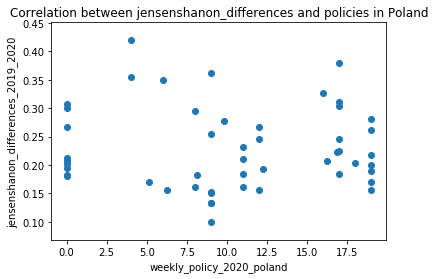

In [74]:

#jensen shanon divergence

from scipy.spatial import distance
jensenshanon_differences= []


for i in range(len(array_weekly_ratios_poland_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_poland_2019[i], array_weekly_ratios_poland_2020[i]))
    

plt.scatter(weekly_policy_2020_poland, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Poland')
plt.xlabel('weekly_policy_2020_poland')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


